In [1]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

# statistical models 
import statsmodels.api as sm

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

# time - test
import time

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
df_hr = pd.read_csv('./hr_csv_transformed.csv')

In [3]:
df_hr.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
0,6108,1,2.0,-0.103865,0.0,-0.503161,0,0,-0.12,0,...,0,0,0,0,0,0,1,0,1,0
1,785,1,1.0,-0.677333,-2.0,-0.225465,0,0,1.04,0,...,0,0,0,0,0,0,1,0,1,0
2,1234,2,0.0,-0.321705,1.0,-0.864038,1,0,-0.44,0,...,0,0,0,0,0,0,1,0,1,0
3,6108,1,0.0,-0.436134,1.0,-0.864038,0,0,-0.08,0,...,0,0,1,0,0,0,1,1,0,0
4,1701,2,0.0,0.732668,-2.0,0.740418,0,0,-0.20,0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        9092 non-null   int64  
 1   education                     9092 non-null   int64  
 2   no_of_trainings               9092 non-null   float64
 3   age                           9092 non-null   float64
 4   previous_year_rating          9092 non-null   float64
 5   length_of_service             9092 non-null   float64
 6   KPIs_met >80%                 9092 non-null   int64  
 7   awards_won?                   9092 non-null   int64  
 8   avg_training_score            9092 non-null   float64
 9   is_promoted                   9092 non-null   int64  
 10  department_Sales & Marketing  9092 non-null   int64  
 11  department_Operations         9092 non-null   int64  
 12  department_Technology         9092 non-null   int64  
 13  dep

In [5]:
df_hr.describe()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,4584.995381,1.290805,0.231522,0.107887,0.583150,-0.043580,0.512868,0.064452,0.283836,0.500000,...,0.015178,0.140013,0.044435,0.036846,0.017268,0.315662,0.684338,0.429059,0.545535,0.025407
std,4079.802512,0.483942,0.559087,0.671022,1.182599,0.699312,0.499862,0.245570,0.579979,0.500027,...,0.122268,0.347020,0.206070,0.188393,0.130275,0.464805,0.464805,0.494969,0.497950,0.157366
min,31.000000,0.000000,0.000000,-1.690290,-2.000000,-1.378193,0.000000,0.000000,-0.760000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1234.000000,1.000000,0.000000,-0.436134,0.000000,-0.503161,0.000000,0.000000,-0.240000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2617.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.160000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6108.000000,2.000000,0.000000,0.476189,2.000000,0.496839,1.000000,0.000000,0.810000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11497.000000,2.000000,7.000000,2.017907,2.000000,2.115994,1.000000,1.000000,1.560000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

0    4546
1    4546
Name: is_promoted, dtype: int64

### 1.1.1 Train and Test Split

In [7]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.1.2 Statistical Models 

In [9]:
# using statistical models to c

# using logit
lgsm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.429350
         Iterations 7


In [10]:
lgsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6364
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                           20
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.3806
Time:                        20:25:04   Log-Likelihood:                -2732.4
converged:                       True   LL-Null:                       -4411.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                        6.851e-06   8.88e-06      0.772      0.440   -1.06e-05    2.43e-05
education                        0.1445      0.079      1.818      0.069      -0.011       0.300
no_of_trainings                 -0.0403      0.062     -0.655      0.513      -0.161       0.080
age                             -0.3805      0.073     -5.199      0.000      -0.524      -0.237
previous_year_rating             0.2490      0.031      8.137      0.000       0.189       0.309
length_of_service                0.1946      0.063      3.086      0.002       0.071       0.318
KPIs_met >80%                    2.6255      0.084     31.276      0.000       2.461       2.790
awards_won?                      1.9333      0.210      9.198      0.000       1.521       2.345
avg_training_score               7.2899      0.233     31.287      0.000       6.833       7.747
department_Sales & Marketing     4.2095        nan        nan        nan         nan         nan
department_Operations            1.3355        nan        nan        nan         nan         nan
department_Technology           -3.8352        nan        nan        nan         nan         nan
department_Analytics            -5.3134        nan        nan        nan         nan         nan
department_R&D                  -5.6380        nan        nan        nan         nan         nan
department_Procurement          -1.3390        nan        nan        nan         nan         nan
department_Finance               1.3003        nan        nan        nan         nan         nan
department_HR                    3.7919        nan        nan        nan         nan         nan
department_Legal                 1.0080        nan        nan        nan         nan         nan
gender_f                        -2.2522    1.2e+06  -1.87e-06      1.000   -2.36e+06    2.36e+06
gender_m                        -2.2282    1.2e+06  -1.85e-06      1.000   -2.36e+06    2.36e+06
recruitment_channel_sourcing    -1.5920        nan        nan        nan         nan         nan
recruitment_channel_other       -1.4742        nan        nan        nan         nan         nan
recruitment_channel_referred    -1.4141        nan        nan        nan         nan         nan
================================================================================================
"""

### 1.2 Build the Model(s) 

### 1.2.1 Logistic Regression 

In [11]:
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1.2.2 Decision Tree Classifier 

In [12]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### 1.2.3 Random Forest Classifier

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### 1.2.4 Support Vector Classifier 

In [14]:
svc = SVC(random_state = 42)
svc.fit(X_train,y_train)

SVC(random_state=42)

### 1.2.5 MLP Classifier 

In [15]:
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

### 1.2.6 ADA Boost 

In [16]:
ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

### 1.2.7 XG Boost 

In [17]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

### 1.3 Evaluate and Improve the Model(s)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    print('\nTest Report:')
    print(classification_report(y_test, test_pred))
    
    cm = confusion_matrix(y_test, test_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')
    plt.show()

### 1.3.1 Model Evaluation

### 1.3.1.1 Logistic Regression

Model: LogisticRegression(random_state=42)

Training score: 0.728786926461345
Testing score: 0.7206744868035191

Test Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1389
           1       0.71      0.74      0.72      1339

    accuracy                           0.72      2728
   macro avg       0.72      0.72      0.72      2728
weighted avg       0.72      0.72      0.72      2728



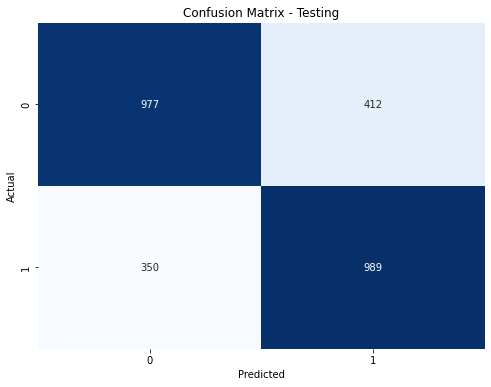

In [19]:
model_scores_classification(lg)

### 1.3.1.2 Decision Tree Classifier 

Model: DecisionTreeClassifier(random_state=42)

Training score: 1.0
Testing score: 0.749266862170088

Test Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1389
           1       0.74      0.75      0.74      1339

    accuracy                           0.75      2728
   macro avg       0.75      0.75      0.75      2728
weighted avg       0.75      0.75      0.75      2728



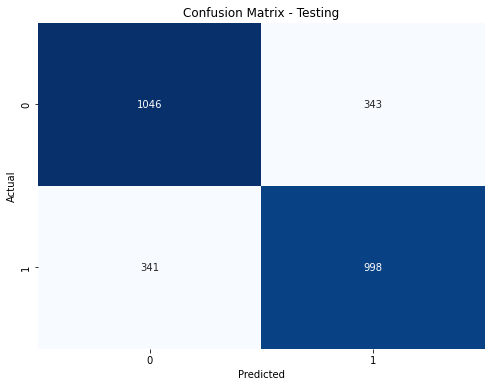

In [20]:
# predictions
model_scores_classification(dtree)

# score is overfitted, due to the nature of dtrees? 
# print the tree the visualise
# consider k-folds then gridsearch to get best params to improve the score 

### 1.3.1.3 Random Forest Classifier 

Model: RandomForestClassifier(random_state=42)

Training score: 1.0
Testing score: 0.7936217008797654

Test Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1389
           1       0.75      0.87      0.80      1339

    accuracy                           0.79      2728
   macro avg       0.80      0.79      0.79      2728
weighted avg       0.80      0.79      0.79      2728



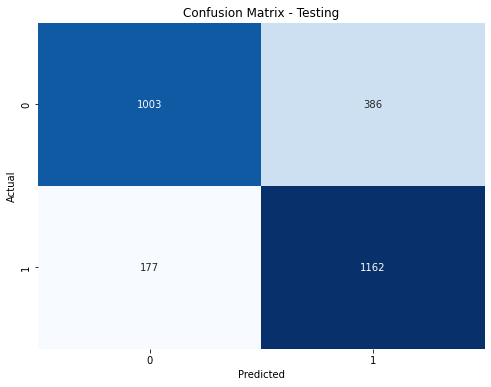

In [21]:
# predictions
model_scores_classification(rf)

# similar outcome to dtree
# plot the tree 

### 1.3.1.4 Support Vector Classifier 

Model: SVC(random_state=42)

Training score: 0.5339409176618479
Testing score: 0.5370234604105572

Test Report:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61      1389
           1       0.54      0.36      0.43      1339

    accuracy                           0.54      2728
   macro avg       0.54      0.53      0.52      2728
weighted avg       0.54      0.54      0.52      2728



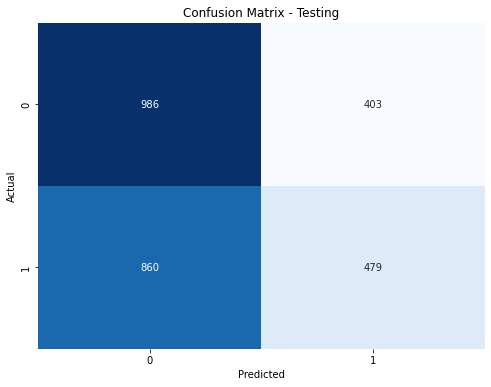

In [22]:
model_scores_classification(svc)

### 1.3.1.5 MLP Classifier 

Model: MLPClassifier(random_state=42)

Training score: 0.6638906348208674
Testing score: 0.6686217008797654

Test Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      1389
           1       0.75      0.49      0.59      1339

    accuracy                           0.67      2728
   macro avg       0.69      0.67      0.66      2728
weighted avg       0.69      0.67      0.66      2728



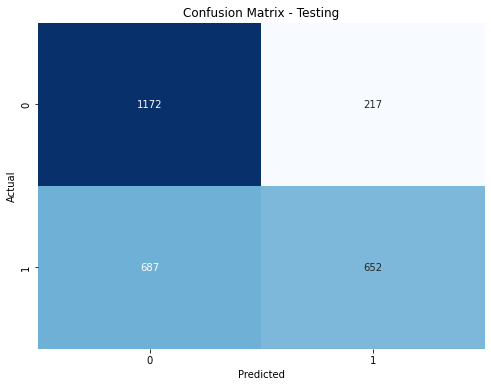

In [23]:
model_scores_classification(mlp)

### 1.3.1.6 ADA Boost 

Model: AdaBoostClassifier(random_state=42)

Training score: 0.7820553111250785
Testing score: 0.7694281524926686

Test Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1389
           1       0.75      0.79      0.77      1339

    accuracy                           0.77      2728
   macro avg       0.77      0.77      0.77      2728
weighted avg       0.77      0.77      0.77      2728



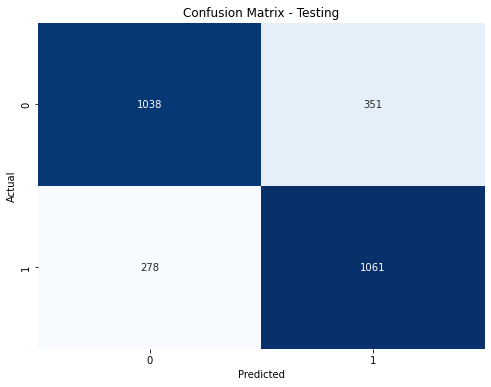

In [24]:
model_scores_classification(ada)

### 1.3.1.7 XG Boost 

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Training score: 0.9335323695788812
Testing score: 0.7994868035190615

Test Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1389
           1       0.77      0.85      0.81      1

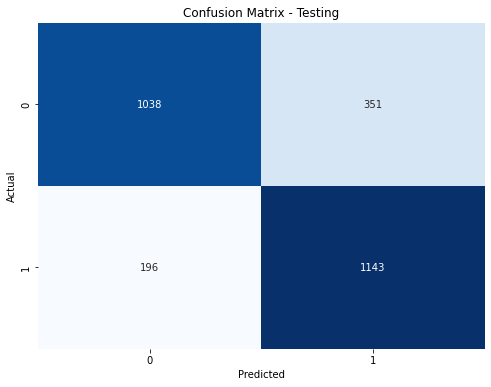

In [25]:
model_scores_classification(xgb)

### 1.3.2 Model Improvements

### 1.3.2.1 Consolidated View of Baseline Model Accuracies

In [26]:
models = [lg, dtree, rf,svc, mlp, ada,xgb]


model_names = ['LogReg', 'DTree', 'RandomForest', 'SVC', 'MLP (ANN)', 'ADA','XGB']

scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

# for ada and xgb, create all the other models first before putting in base estimators 
# choosing models 
# logreg 
# random forest 
# boosting models 
# bagging classifier 
# stacking classifier

,Model,Train Score,Test Score
0,LogReg,0.728787,0.720674
1,DTree,1.000000,0.749267
2,RandomForest,1.000000,0.793622
3,SVC,0.533941,0.537023
4,MLP (ANN),0.663891,0.668622
5,ADA,0.782055,0.769428
6,XGB,0.933532,0.799487


### 1.3.3 Logistic Regression

### Hyperparameter Tuning using GridSearchCV

In [27]:
param_grid = {'penalty' : ['l1','l2','elasticnet',None],
              'C' : [0.2,0.5,0.8,1], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear'],
              'max_iter' : [1000,1500,2000]}

In [28]:
grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END C=0.2, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=1000, penalty=l1, solver=saga;, score=0.590 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=1000, penalty=l1, solver=saga;, score=0.603 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=1000, penalty=l1, solver=saga;, score=0.597 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=1000, penalty=l1, solver=saga;, score=0.554 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=1000, penalty=l1, solver=saga;, score=0.579 total time=   1.7s
[CV 1/5] END C=0.2, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=1000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1000, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1000, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1000, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=1000, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=1000, penalty=l2, solver=saga;, score=0.592 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=1000, penalty=l2, solver=saga;, score=0.603 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=1000, penalty=l2, solver=saga;, score=0.596 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=1000, penalty=l2, solver=saga;, score=0.554 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=1000, penalty=l2, solver=saga;, score=0.579 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=1000, penalty=l2, solver=sag;, score=0.628 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=1000, penalty=l2, solver=sag;, score=0.629 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=1000, penalty=l2, solver=sag;, score=0.641 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=1000, penalty=l2, solver=sag;, score=0.589 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=1000, penalty=l2, solver=sag;, score=0.618 total time=   1.4s
[CV 1/5] END C=0.2, max_iter=1000, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1000, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1000, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1000, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=1000, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=1500, penalty=l1, solver=saga;, score=0.616 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=1500, penalty=l1, solver=saga;, score=0.610 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=1500, penalty=l1, solver=saga;, score=0.619 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=1500, penalty=l1, solver=saga;, score=0.569 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=1500, penalty=l1, solver=saga;, score=0.601 total time=   3.1s
[CV 1/5] END C=0.2, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=1500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1500, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=1500, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=1500, penalty=l2, solver=saga;, score=0.617 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=1500, penalty=l2, solver=saga;, score=0.610 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=1500, penalty=l2, solver=saga;, score=0.620 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=1500, penalty=l2, solver=saga;, score=0.568 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=1500, penalty=l2, solver=saga;, score=0.602 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=1500, penalty=l2, solver=sag;, score=0.663 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=1500, penalty=l2, solver=sag;, score=0.627 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=1500, penalty=l2, solver=sag;, score=0.653 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=1500, penalty=l2, solver=sag;, score=0.612 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=1500, penalty=l2, solver=sag;, score=0.639 total time=   2.0s
[CV 1/5] END C=0.2, max_iter=1500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1500, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1500, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1500, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=1500, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=2000, penalty=l1, solver=saga;, score=0.627 total time=   3.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=2000, penalty=l1, solver=saga;, score=0.630 total time=   3.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=2000, penalty=l1, solver=saga;, score=0.638 total time=   4.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=2000, penalty=l1, solver=saga;, score=0.588 total time=   3.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=2000, penalty=l1, solver=saga;, score=0.617 total time=   3.4s
[CV 1/5] END C=0.2, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=2000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=2000, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=2000, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=2000, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=2000, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=2000, penalty=l2, solver=saga;, score=0.628 total time=   3.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=2000, penalty=l2, solver=saga;, score=0.629 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=2000, penalty=l2, solver=saga;, score=0.641 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=2000, penalty=l2, solver=saga;, score=0.589 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=2000, penalty=l2, solver=saga;, score=0.618 total time=   2.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=2000, penalty=l2, solver=sag;, score=0.665 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=2000, penalty=l2, solver=sag;, score=0.661 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=2000, penalty=l2, solver=sag;, score=0.659 total time=   2.7s
[CV 1/5] END C=0.2, max_iter=2000, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=2000, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=2000, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=2000, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=2000, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=1000, penalty=l1, solver=saga;, score=0.589 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=1000, penalty=l1, solver=saga;, score=0.602 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=1000, penalty=l1, solver=saga;, score=0.596 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=1000, penalty=l1, solver=saga;, score=0.554 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=1000, penalty=l1, solver=saga;, score=0.579 total time=   1.5s
[CV 1/5] END C=0.5, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=1000, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=1000, penalty=l2, solver=saga;, score=0.592 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=1000, penalty=l2, solver=saga;, score=0.603 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=1000, penalty=l2, solver=saga;, score=0.596 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=1000, penalty=l2, solver=saga;, score=0.554 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=1000, penalty=l2, solver=saga;, score=0.579 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=1000, penalty=l2, solver=sag;, score=0.628 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=1000, penalty=l2, solver=sag;, score=0.629 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=1000, penalty=l2, solver=sag;, score=0.641 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=1000, penalty=l2, solver=sag;, score=0.589 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=1000, penalty=l2, solver=sag;, score=0.618 total time=   1.0s
[CV 1/5] END C=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=1000, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=1500, penalty=l1, solver=saga;, score=0.616 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=1500, penalty=l1, solver=saga;, score=0.610 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=1500, penalty=l1, solver=saga;, score=0.619 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=1500, penalty=l1, solver=saga;, score=0.568 total time=   2.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=1500, penalty=l1, solver=saga;, score=0.602 total time=   2.6s
[CV 1/5] END C=0.5, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=1500, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=1500, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=1500, penalty=l2, solver=saga;, score=0.617 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=1500, penalty=l2, solver=saga;, score=0.610 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=1500, penalty=l2, solver=saga;, score=0.620 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=1500, penalty=l2, solver=saga;, score=0.568 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=1500, penalty=l2, solver=saga;, score=0.602 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=1500, penalty=l2, solver=sag;, score=0.663 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=1500, penalty=l2, solver=sag;, score=0.627 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=1500, penalty=l2, solver=sag;, score=0.653 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=1500, penalty=l2, solver=sag;, score=0.612 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=1500, penalty=l2, solver=sag;, score=0.639 total time=   1.6s
[CV 1/5] END C=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=1500, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=2000, penalty=l1, solver=saga;, score=0.628 total time=   3.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=2000, penalty=l1, solver=saga;, score=0.629 total time=   3.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=2000, penalty=l1, solver=saga;, score=0.639 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=2000, penalty=l1, solver=saga;, score=0.589 total time=   3.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=2000, penalty=l1, solver=saga;, score=0.617 total time=   3.6s
[CV 1/5] END C=0.5, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=2000, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=2000, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=2000, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=2000, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=2000, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=2000, penalty=l2, solver=saga;, score=0.628 total time=   2.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=2000, penalty=l2, solver=saga;, score=0.629 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=2000, penalty=l2, solver=saga;, score=0.641 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=2000, penalty=l2, solver=saga;, score=0.589 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=2000, penalty=l2, solver=saga;, score=0.618 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=2000, penalty=l2, solver=sag;, score=0.665 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=2000, penalty=l2, solver=sag;, score=0.661 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=2000, penalty=l2, solver=sag;, score=0.659 total time=   2.6s
[CV 1/5] END C=0.5, max_iter=2000, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=2000, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=2000, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=2000, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=2000, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=1000, penalty=l1, solver=saga;, score=0.591 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=1000, penalty=l1, solver=saga;, score=0.603 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=1000, penalty=l1, solver=saga;, score=0.596 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=1000, penalty=l1, solver=saga;, score=0.554 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=1000, penalty=l1, solver=saga;, score=0.579 total time=   1.4s
[CV 1/5] END C=0.8, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=1000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1000, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1000, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=1000, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=1000, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=1000, penalty=l2, solver=saga;, score=0.592 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=1000, penalty=l2, solver=saga;, score=0.603 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=1000, penalty=l2, solver=saga;, score=0.596 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=1000, penalty=l2, solver=saga;, score=0.554 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=1000, penalty=l2, solver=saga;, score=0.579 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=1000, penalty=l2, solver=sag;, score=0.628 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=1000, penalty=l2, solver=sag;, score=0.629 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=1000, penalty=l2, solver=sag;, score=0.641 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=1000, penalty=l2, solver=sag;, score=0.589 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=1000, penalty=l2, solver=sag;, score=0.618 total time=   1.0s
[CV 1/5] END C=0.8, max_iter=1000, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1000, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1000, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=1000, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=1000, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=1500, penalty=l1, solver=saga;, score=0.616 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=1500, penalty=l1, solver=saga;, score=0.610 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=1500, penalty=l1, solver=saga;, score=0.620 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=1500, penalty=l1, solver=saga;, score=0.568 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=1500, penalty=l1, solver=saga;, score=0.603 total time=   2.8s
[CV 1/5] END C=0.8, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=1500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1500, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=1500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=1500, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=1500, penalty=l2, solver=saga;, score=0.617 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=1500, penalty=l2, solver=saga;, score=0.610 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=1500, penalty=l2, solver=saga;, score=0.620 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=1500, penalty=l2, solver=saga;, score=0.568 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=1500, penalty=l2, solver=saga;, score=0.602 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=1500, penalty=l2, solver=sag;, score=0.663 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=1500, penalty=l2, solver=sag;, score=0.627 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=1500, penalty=l2, solver=sag;, score=0.653 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=1500, penalty=l2, solver=sag;, score=0.612 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=1500, penalty=l2, solver=sag;, score=0.639 total time=   1.9s
[CV 1/5] END C=0.8, max_iter=1500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1500, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=1500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=1500, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=2000, penalty=l1, solver=saga;, score=0.628 total time=   3.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=2000, penalty=l1, solver=saga;, score=0.629 total time=   3.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=2000, penalty=l1, solver=saga;, score=0.639 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=2000, penalty=l1, solver=saga;, score=0.589 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=2000, penalty=l1, solver=saga;, score=0.617 total time=   3.3s
[CV 1/5] END C=0.8, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=2000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=2000, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=2000, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=2000, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=2000, penalty=l1, solver=liblinear;, score=0.7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=2000, penalty=l2, solver=saga;, score=0.628 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=2000, penalty=l2, solver=saga;, score=0.629 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=2000, penalty=l2, solver=saga;, score=0.641 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=2000, penalty=l2, solver=saga;, score=0.589 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=2000, penalty=l2, solver=saga;, score=0.618 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=2000, penalty=l2, solver=sag;, score=0.665 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=2000, penalty=l2, solver=sag;, score=0.661 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=2000, penalty=l2, solver=sag;, score=0.659 total time=   2.1s
[CV 1/5] END C=0.8, max_iter=2000, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=2000, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=2000, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=2000, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=2000, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.591 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.603 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.596 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.554 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.579 total time=   1.5s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.592 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.603 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.596 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.554 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=saga;, score=0.579 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.628 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.629 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.641 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.589 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=sag;, score=0.618 total time=   1.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=elastic

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1500, penalty=l1, solver=saga;, score=0.616 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1500, penalty=l1, solver=saga;, score=0.610 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1500, penalty=l1, solver=saga;, score=0.620 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1500, penalty=l1, solver=saga;, score=0.568 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1500, penalty=l1, solver=saga;, score=0.603 total time=   2.2s
[CV 1/5] END C=1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=1500, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=1500, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=1500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=1500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1500, penalty=l2, solver=saga;, score=0.617 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1500, penalty=l2, solver=saga;, score=0.610 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1500, penalty=l2, solver=saga;, score=0.620 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1500, penalty=l2, solver=saga;, score=0.568 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1500, penalty=l2, solver=saga;, score=0.602 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=1500, penalty=l2, solver=sag;, score=0.663 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=1500, penalty=l2, solver=sag;, score=0.627 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=1500, penalty=l2, solver=sag;, score=0.653 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=1500, penalty=l2, solver=sag;, score=0.612 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=1500, penalty=l2, solver=sag;, score=0.639 total time=   1.6s
[CV 1/5] END C=1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=1500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1500, penalty=elastic

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=2000, penalty=l1, solver=saga;, score=0.628 total time=   3.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=2000, penalty=l1, solver=saga;, score=0.629 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=2000, penalty=l1, solver=saga;, score=0.639 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=2000, penalty=l1, solver=saga;, score=0.589 total time=   3.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=2000, penalty=l1, solver=saga;, score=0.618 total time=   3.0s
[CV 1/5] END C=1, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=2000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=2000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=2000, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=2000, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=2000, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=2000, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=2000, penalty=l2, solver=saga;, score=0.628 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=2000, penalty=l2, solver=saga;, score=0.629 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=2000, penalty=l2, solver=saga;, score=0.641 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=2000, penalty=l2, solver=saga;, score=0.589 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=2000, penalty=l2, solver=saga;, score=0.618 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.665 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.661 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.625 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(se

[CV 5/5] END C=1, max_iter=2000, penalty=l2, solver=sag;, score=0.659 total time=   2.0s
[CV 1/5] END C=1, max_iter=2000, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=2000, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=2000, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=2000, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=2000, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=2000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=2000, penalty=elastic

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.2, 0.5, 0.8, 1],
                         'max_iter': [1000, 1500, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'saga', 'sag', 'liblinear']},
             scoring='accuracy', verbose=3)

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.7877134931104163
{'C': 0.8, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


### lower range of max_iter

In [31]:
start = time.time()

In [32]:
param_grid = {'penalty' : ['l1','l2','elasticnet',None],
              'C' : [0.2,0.5,0.8,1], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear'],
              'max_iter' : [100,100,200]}

In [33]:
grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3)

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END C=0.2, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.514 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.515 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=lbfgs;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=lbfgs;, score=0.742 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.1s
[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.1s
[CV 1/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.515 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=lbfgs;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=lbfgs;, score=0.742 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=100, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=100, penalty=elas

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=200, penalty=l1, solver=saga;, score=0.528 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=200, penalty=l1, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=200, penalty=l1, solver=saga;, score=0.532 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=200, penalty=l1, solver=saga;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=200, penalty=l1, solver=saga;, score=0.528 total time=   0.2s
[CV 1/5] END C=0.2, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=200, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=200, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=200, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=200, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=200, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 3/5] END C=0.2, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=200, penalty=l2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=200, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 1/5] END C=0.2, max_iter=200, penalty=l2, solver=saga;, score=0.527 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=200, penalty=l2, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=200, penalty=l2, solver=saga;, score=0.532 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=200, penalty=l2, solver=saga;, score=0.513 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=200, penalty=l2, solver=saga;, score=0.528 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=200, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=200, penalty=l2, solver=sag;, score=0.554 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=200, penalty=l2, solver=sag;, score=0.555 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=200, penalty=l2, solver=sag;, score=0.524 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=200, penalty=l2, solver=sag;, score=0.546 total time=   0.1s
[CV 1/5] END C=0.2, max_iter=200, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=200, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=200, penalty=l2, solver=liblinear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=200, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=200, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=200, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.515 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.793 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 3/5] END C=0.5, max_iter=100, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=elas

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.515 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.793 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.527 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.532 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.513 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.528 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=200, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=200, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=200, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=200, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, penalty=l1, solver=liblinear;, score=0.793 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 4/5] END C=0.5, max_iter=200, penalty=l2, solver=lbfgs;, score=0.754 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.527 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.532 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.513 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.528 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=200, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=200, penalty=l2, solver=sag;, score=0.554 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=200, penalty=l2, solver=sag;, score=0.555 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=200, penalty=l2, solver=sag;, score=0.524 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=200, penalty=l2, solver=sag;, score=0.546 total time=   0.1s
[CV 1/5] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=200, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.754 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.707 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=elas

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.723 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.754 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.707 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=lbfgs;, score=0.736 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=100, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=100, penalty=elas

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=200, penalty=l1, solver=saga;, score=0.527 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=200, penalty=l1, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=200, penalty=l1, solver=saga;, score=0.532 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=200, penalty=l1, solver=saga;, score=0.513 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=200, penalty=l1, solver=saga;, score=0.528 total time=   0.2s
[CV 1/5] END C=0.8, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=200, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=200, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=200, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=200, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=200, penalty=l1, solver=liblinear;, score=0.796 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 5/5] END C=0.8, max_iter=200, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=200, penalty=l2, solver=saga;, score=0.527 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=200, penalty=l2, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=200, penalty=l2, solver=saga;, score=0.532 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=200, penalty=l2, solver=saga;, score=0.513 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=200, penalty=l2, solver=saga;, score=0.528 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=200, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=200, penalty=l2, solver=sag;, score=0.554 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=200, penalty=l2, solver=sag;, score=0.555 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=200, penalty=l2, solver=sag;, score=0.524 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=200, penalty=l2, solver=sag;, score=0.546 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=200, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=200, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=200, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=200, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=200, penalty=l2, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=200, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;,

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.514 total time=   0.1s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.516 total time=   0.1s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.509 total time=   0.1s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.739 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.720 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.514 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.516 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.506 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.509 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.527 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.533 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.532 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.513 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.528 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs;,

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.527 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.532 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.513 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.528 total time=   0.3s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.720 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.527 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.532 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.513 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.528 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.554 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.555 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.524 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(se

[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.546 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=elasticnet, solver

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.51209889        nan 0.78708493 0.72973168 0.512256
 0.52655578 0.78174285        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.51209889
        nan 0.78708493 0.72973168 0.512256   0.52655578 0.78174285
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.52686999        nan 0.78708493
 0.75534702 0.52655578 0.5446263  0.78174285        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.51209889        nan 0.78645613 0.72611681 0.512256
 0.52655578 0.78582744        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.51209889
        nan 0.78645613 0.72611681 0.512256   0.52655578 0.78582744
        nan        nan        nan        nan        nan   

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.2, 0.5, 0.8, 1], 'max_iter': [100, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'saga', 'sag', 'liblinear']},
             scoring='accuracy', verbose=3)

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.7877134931104163
{'C': 0.8, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [36]:
end = time.time()

elapsed = end-start 

print(elapsed)

42.662755489349365


### Improved Model after GridSearchCV 

In [37]:
# lg2 for improved model from GS
lg2 = LogisticRegression(C = 0.8,max_iter = 1000,penalty = 'l1',solver = 'liblinear',random_state=42).fit(X_train, y_train)

Model: LogisticRegression(C=0.8, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

Training score: 0.7910119421747329
Testing score: 0.7738269794721407

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1389
           1       0.75      0.81      0.78      1339

    accuracy                           0.77      2728
   macro avg       0.78      0.77      0.77      2728
weighted avg       0.78      0.77      0.77      2728



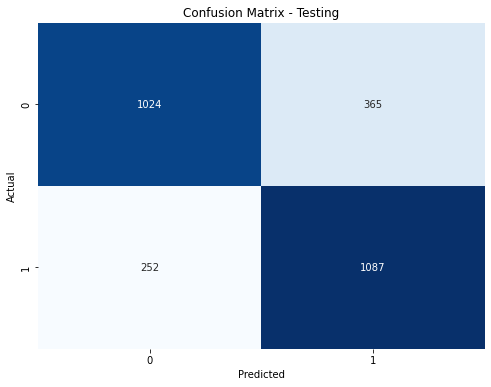

In [38]:
model_scores_classification(lg2)

### max_iter vs. accuracy 

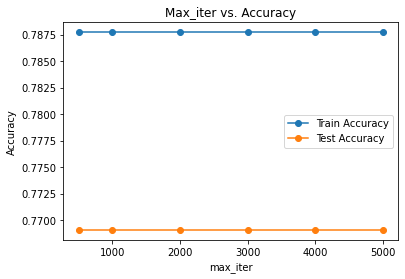

In [39]:
max_iter_values = [500, 1000, 2000, 3000, 4000, 5000]
train_scores = []
test_scores = []

for max_iter_val in max_iter_values:
    lg2 = LogisticRegression(C=0.8, max_iter=max_iter_val, penalty='l1', solver='liblinear', random_state=42)
    
    # Calculate training score
    train_score = np.mean(cross_val_score(lg2, X_train, y_train, cv=5))
    train_scores.append(train_score)

    # Calculate test score
    test_score = np.mean(cross_val_score(lg2, X_test, y_test, cv=5))  # Assuming X_test and y_test are your test data
    test_scores.append(test_score)

plt.plot(max_iter_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(max_iter_values, test_scores, marker='o', label='Test Accuracy')
plt.title('Max_iter vs. Accuracy')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.3.4 Decision Tree Classifier  

### Hyperparameter Tuning using GridSearchCV 

In [40]:
param_grid = {'criterion' : ['gini','entropy'], # measures quality of the split
              'splitter' : ['best','random'], # best split of each node
              'max_depth' : [1000,3000,5000]}

In [41]:
grid = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring='accuracy',verbose = 3)

In [42]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=1000, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1000, splitter=best;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1000, splitter=best;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1000, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1000, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1000, splitter=random;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1000, splitter=random;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1000, splitter=random;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1000, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1000, splitter=random;, score=0.759 total time=   0.0s
[CV 1/5] 

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1000, 3000, 5000],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [43]:
print(grid.best_score_)
print(grid.best_params_)

0.7660304485516806
{'criterion': 'entropy', 'max_depth': 1000, 'splitter': 'best'}


### Improved Model after GridSearchCV

In [44]:
# dtree2 as the new model 
dtree2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 1000,splitter='best').fit(X_train,y_train)

Model: DecisionTreeClassifier(criterion='entropy', max_depth=1000)

Training score: 1.0
Testing score: 0.7576979472140762

Test Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1389
           1       0.75      0.76      0.76      1339

    accuracy                           0.76      2728
   macro avg       0.76      0.76      0.76      2728
weighted avg       0.76      0.76      0.76      2728



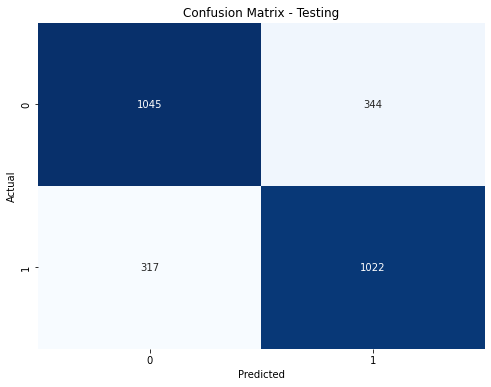

In [45]:
# evaluate accuracy 
model_scores_classification(dtree2)

# improved the overfitted model, and test data increased in accuracy
# overfitting can be handled by bagging classifier, but we would like to try boosting first  

In [46]:
# visualise the tree for feature importances? 
# plt.figure(figsize=(25,10))
# tree.plot_tree(dtree2,
#               feature_names = list(df_hr.drop(['is_promoted'], axis=1)),
#                 class_names = ['0','1'],
#                 rounded = True,
#                 filled= True)
# plt.savefig('tree1.png',format='png')
# plt.show()   

### max_depth vs. accuracy

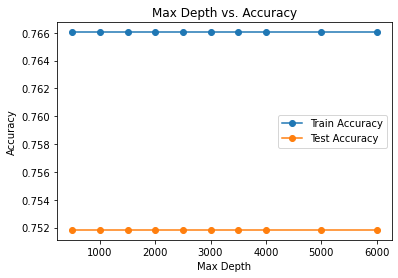

In [47]:
max_depth_values = [500, 1000, 1500, 2000, 2500, 3000,3500,4000,5000,6000]
train_scores = []
test_scores = []

for max_depth_val in max_depth_values:
    dtree2 = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_val, splitter='best', random_state=42)
    
    # Calculate training score
    train_score = np.mean(cross_val_score(dtree2, X_train, y_train, cv=5))
    train_scores.append(train_score)

    # Calculate test score
    test_score = np.mean(cross_val_score(dtree2, X_test, y_test, cv=5))  # Assuming X_test and y_test are your test data
    test_scores.append(test_score)

plt.plot(max_depth_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(max_depth_values, test_scores, marker='o', label='Test Accuracy')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.3.5 Random Forest Classifier 

### Hyperparameter Tuning using GridSearchCV 

In [48]:
param_grid = {'n_estimators' : [100,300,500,1000], # number of trees 
              'criterion' : ['gini','entropy','log_loss'], # function that measures quality of split
              'max_depth' : [100,300,500]} # max depth of the tree, expands till less samples 

In [49]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3)

In [50]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=100, n_estimators=100;, score=0.798 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=100, n_estimators=100;, score=0.790 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=100, n_estimators=100;, score=0.800 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=100, n_estimators=100;, score=0.804 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=100, n_estimators=100;, score=0.804 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=100, n_estimators=300;, score=0.795 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=100, n_estimators=300;, score=0.802 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=100, n_estimators=300;, score=0.796 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=100, n_estimators=300;, score=0.815 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=100, n_estimators=300;, score=0.812 total time=   1.1

[CV 2/5] END criterion=entropy, max_depth=300, n_estimators=300;, score=0.798 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=300, n_estimators=300;, score=0.800 total time=   1.8s
[CV 4/5] END criterion=entropy, max_depth=300, n_estimators=300;, score=0.815 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=300, n_estimators=300;, score=0.812 total time=   1.6s
[CV 1/5] END criterion=entropy, max_depth=300, n_estimators=500;, score=0.793 total time=   2.8s
[CV 2/5] END criterion=entropy, max_depth=300, n_estimators=500;, score=0.797 total time=   2.4s
[CV 3/5] END criterion=entropy, max_depth=300, n_estimators=500;, score=0.797 total time=   2.4s
[CV 4/5] END criterion=entropy, max_depth=300, n_estimators=500;, score=0.811 total time=   2.4s
[CV 5/5] END criterion=entropy, max_depth=300, n_estimators=500;, score=0.811 total time=   2.4s
[CV 1/5] END criterion=entropy, max_depth=300, n_estimators=1000;, score=0.799 total time=   5.0s
[CV 2/5] END criterion=entrop

[CV 2/5] END criterion=log_loss, max_depth=500, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=500, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=500, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=500, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=500, n_estimators=1000;, score=nan total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=500, n_estimators=1000;, score=nan total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=500, n_estimators=1000;, score=nan total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=500, n_estimators=1000;, score=nan total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=500, n_estimators=1000;, score=nan total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 300, 500],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='accuracy', verbose=3)

In [51]:
print(grid.best_score_)
print(grid.best_params_)

0.8056262876283924
{'criterion': 'gini', 'max_depth': 100, 'n_estimators': 500}


### Improved Model from GridSearchCV

In [52]:
rf2 = RandomForestClassifier(criterion = 'gini', max_depth = 100,n_estimators = 500,random_state=42)

In [53]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42)

Model: RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42)

Training score: 1.0
Testing score: 0.7969208211143695

Test Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1389
           1       0.75      0.88      0.81      1339

    accuracy                           0.80      2728
   macro avg       0.80      0.80      0.80      2728
weighted avg       0.81      0.80      0.80      2728



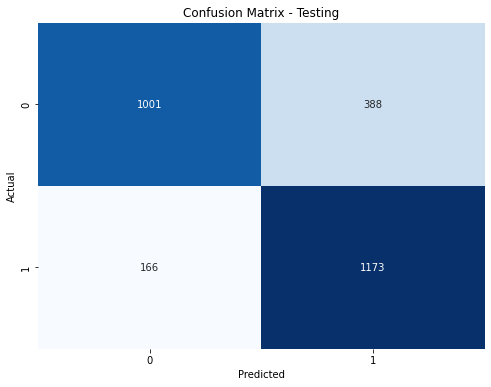

In [54]:
model_scores_classification(rf2)

### 1.3.5 SVC 

### Hyperparameter Tuning using GridSearchCV 

In [55]:
param_grid = {'C' : [0.2,0.6,1,2], #compare the C accuracy as it goes? instead of just using gridsearch which may not be too efficient
              'kernel' : ['linear','poly','rbf','sigmoid'],
              'gamma' : ['scale','auto'],# compare accuracy against gamma number also instead of just gridsearch 
              'max_iter' : [1000,3000,5000]} 

In [56]:
grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy',verbose = 3)

In [57]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=scale, kernel=linear, max_iter=1000;, score=0.467 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=scale, kernel=linear, max_iter=1000;, score=0.540 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=scale, kernel=linear, max_iter=1000;, score=0.581 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=scale, kernel=linear, max_iter=1000;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=scale, kernel=linear, max_iter=1000;, score=0.512 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=scale, kernel=linear, max_iter=3000;, score=0.519 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=scale, kernel=linear, max_iter=3000;, score=0.532 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=scale, kernel=linear, max_iter=3000;, score=0.514 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=scale, kernel=linear, max_iter=3000;, score=0.599 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=scale, kernel=linear, max_iter=3000;, score=0.516 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=scale, kernel=linear, max_iter=5000;, score=0.539 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=scale, kernel=linear, max_iter=5000;, score=0.537 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=scale, kernel=linear, max_iter=5000;, score=0.558 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=scale, kernel=linear, max_iter=5000;, score=0.600 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=scale, kernel=linear, max_iter=5000;, score=0.502 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=scale, kernel=poly, max_iter=1000;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=scale, kernel=poly, max_iter=1000;, score=0.527 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=scale, kernel=poly, max_iter=1000;, score=0.516 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=scale, kernel=poly, max_iter=1000;, score=0.526 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=scale, kernel=poly, max_iter=1000;, score=0.535 total time=   0.4s
[CV 1/5] END C=0.2, gamma=scale, kernel=poly, max_iter=3000;, score=0.507 total time=   1.4s
[CV 2/5] END C=0.2, gamma=scale, kernel=poly, max_iter=3000;, score=0.504 total time=   1.5s
[CV 3/5] END C=0.2, gamma=scale, kernel=poly, max_iter=3000;, score=0.519 total time=   1.4s
[CV 4/5] END C=0.2, gamma=scale, kernel=poly, max_iter=3000;, score=0.526 total time=   1.4s
[CV 5/5] END C=0.2, gamma=scale, kernel=poly, max_iter=3000;, score=0.516 total time=   1.8s
[CV 1/5] END C=0.2, gamma=scale, kernel=poly, max_iter=5000;, score=0.507 total time=   1.9s
[CV 2/5] END C=0.2, gamma=scale, kernel=poly, max_iter=5000;, score=0.504 total time=   1.6s
[CV 3/5] END C=0.2, gamma=scale, kernel=poly, max_iter=5000;, score=0.519 total time=   1.2s
[CV 4/5] END C=0.2, gamma=scale, kernel=poly, max_iter=5000;, score=0.526 total time=   1.2s
[CV 5/5] END C=0.2, gamma=scale, kernel=poly, max_iter=5000;, score=0.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.544 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.563 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.466 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.526 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.486 total time=   0.6s
[CV 1/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.530 total time=   2.2s
[CV 2/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.531 total time=   2.2s
[CV 3/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.553 total time=   2.4s
[CV 4/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.528 total time=   2.3s
[CV 5/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.526 total time=   2.2s
[CV 1/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.530 total time=   2.4s
[CV 2/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.531 total time=   2.4s
[CV 3/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.553 total time=   2.3s
[CV 4/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.528 total time=   2.1s
[CV 5/5] END C=0.2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.526 total t

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.463 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.520 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.546 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.527 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.458 total time=   0.6s
[CV 1/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.494 total time=   1.3s
[CV 2/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.520 total time=   1.2s
[CV 3/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.546 total time=   0.9s
[CV 4/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.527 total time=   1.0s
[CV 5/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.488 total time=   1.2s
[CV 1/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.494 total time=   1.4s
[CV 2/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.520 total time=   1.3s
[CV 3/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.546 total time=   1.2s
[CV 4/5] END C=0.2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.527 total time=   1.1s
[CV 5/5] END C=0.2, gamma=scale, kernel=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=linear, max_iter=1000;, score=0.467 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=linear, max_iter=1000;, score=0.540 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=linear, max_iter=1000;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=linear, max_iter=1000;, score=0.566 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=linear, max_iter=1000;, score=0.512 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=linear, max_iter=3000;, score=0.519 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=linear, max_iter=3000;, score=0.532 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=linear, max_iter=3000;, score=0.514 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=linear, max_iter=3000;, score=0.599 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=linear, max_iter=3000;, score=0.516 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=linear, max_iter=5000;, score=0.539 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=linear, max_iter=5000;, score=0.537 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=linear, max_iter=5000;, score=0.558 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=linear, max_iter=5000;, score=0.600 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=linear, max_iter=5000;, score=0.502 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=poly, max_iter=1000;, score=0.608 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=poly, max_iter=1000;, score=0.537 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=poly, max_iter=1000;, score=0.554 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=poly, max_iter=1000;, score=0.474 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=poly, max_iter=1000;, score=0.656 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=poly, max_iter=3000;, score=0.554 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=poly, max_iter=3000;, score=0.537 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=poly, max_iter=3000;, score=0.636 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=poly, max_iter=3000;, score=0.570 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=poly, max_iter=3000;, score=0.563 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=poly, max_iter=5000;, score=0.554 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=poly, max_iter=5000;, score=0.537 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=poly, max_iter=5000;, score=0.636 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=poly, max_iter=5000;, score=0.570 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=poly, max_iter=5000;, score=0.564 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.661 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.597 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.597 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.641 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.585 total time=   1.3s
[CV 1/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.663 total time=   3.3s
[CV 2/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.662 total time=   3.3s
[CV 3/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.698 total time=   3.2s
[CV 4/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.648 total time=   3.1s
[CV 5/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.667 total time=   3.3s
[CV 1/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.663 total time=   3.4s
[CV 2/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.662 total time=   3.5s
[CV 3/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.698 total time=   3.5s
[CV 4/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.648 total time=   3.8s
[CV 5/5] END C=0.2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.667 total time=   3.8s

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s
[CV 1/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.4s
[CV 2/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.4s
[CV 3/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.2s
[CV 4/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.3s
[CV 5/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.3s
[CV 1/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.2s
[CV 2/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.2s
[CV 3/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.3s
[CV 4/5] END C=0.2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.3s
[CV 5/5] END C=0.2, gamma=auto, kernel=sigmoid, ma

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=scale, kernel=linear, max_iter=1000;, score=0.509 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=scale, kernel=linear, max_iter=1000;, score=0.541 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=scale, kernel=linear, max_iter=1000;, score=0.524 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=scale, kernel=linear, max_iter=1000;, score=0.515 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=scale, kernel=linear, max_iter=1000;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=scale, kernel=linear, max_iter=3000;, score=0.533 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=scale, kernel=linear, max_iter=3000;, score=0.543 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=scale, kernel=linear, max_iter=3000;, score=0.643 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=scale, kernel=linear, max_iter=3000;, score=0.515 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=scale, kernel=linear, max_iter=3000;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=scale, kernel=linear, max_iter=5000;, score=0.485 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=scale, kernel=linear, max_iter=5000;, score=0.548 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=scale, kernel=linear, max_iter=5000;, score=0.643 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=scale, kernel=linear, max_iter=5000;, score=0.515 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=scale, kernel=linear, max_iter=5000;, score=0.514 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=scale, kernel=poly, max_iter=1000;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=scale, kernel=poly, max_iter=1000;, score=0.537 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=scale, kernel=poly, max_iter=1000;, score=0.521 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=scale, kernel=poly, max_iter=1000;, score=0.527 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=scale, kernel=poly, max_iter=1000;, score=0.532 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=scale, kernel=poly, max_iter=3000;, score=0.507 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=scale, kernel=poly, max_iter=3000;, score=0.496 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=scale, kernel=poly, max_iter=3000;, score=0.496 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=scale, kernel=poly, max_iter=3000;, score=0.526 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=scale, kernel=poly, max_iter=3000;, score=0.516 total time=   1.6s
[CV 1/5] END C=0.6, gamma=scale, kernel=poly, max_iter=5000;, score=0.507 total time=   1.6s
[CV 2/5] END C=0.6, gamma=scale, kernel=poly, max_iter=5000;, score=0.504 total time=   1.4s
[CV 3/5] END C=0.6, gamma=scale, kernel=poly, max_iter=5000;, score=0.519 total time=   1.3s
[CV 4/5] END C=0.6, gamma=scale, kernel=poly, max_iter=5000;, score=0.526 total time=   1.3s
[CV 5/5] END C=0.6, gamma=scale, kernel=poly, max_iter=5000;, score=0.516 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=1000;, score=0.467 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=1000;, score=0.519 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=1000;, score=0.555 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=1000;, score=0.499 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=1000;, score=0.517 total time=   0.8s
[CV 1/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=3000;, score=0.530 total time=   2.2s
[CV 2/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=3000;, score=0.531 total time=   2.3s
[CV 3/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=3000;, score=0.553 total time=   2.0s
[CV 4/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=3000;, score=0.528 total time=   1.9s
[CV 5/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=3000;, score=0.526 total time=   1.9s
[CV 1/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=5000;, score=0.530 total time=   1.9s
[CV 2/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=5000;, score=0.531 total time=   1.9s
[CV 3/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=5000;, score=0.553 total time=   1.9s
[CV 4/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=5000;, score=0.528 total time=   1.9s
[CV 5/5] END C=0.6, gamma=scale, kernel=rbf, max_iter=5000;, score=0.526 total t

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.463 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.521 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.546 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.527 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.458 total time=   0.5s
[CV 1/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.494 total time=   1.1s
[CV 2/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.520 total time=   0.9s
[CV 3/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.546 total time=   1.0s
[CV 4/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.527 total time=   1.0s
[CV 5/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.488 total time=   1.1s
[CV 1/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.494 total time=   1.2s
[CV 2/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.520 total time=   1.1s
[CV 3/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.546 total time=   1.0s
[CV 4/5] END C=0.6, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.527 total time=   1.0s
[CV 5/5] END C=0.6, gamma=scale, kernel=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=linear, max_iter=1000;, score=0.509 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=linear, max_iter=1000;, score=0.541 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=linear, max_iter=1000;, score=0.524 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=linear, max_iter=1000;, score=0.515 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=linear, max_iter=1000;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=linear, max_iter=3000;, score=0.533 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=linear, max_iter=3000;, score=0.543 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=linear, max_iter=3000;, score=0.643 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=linear, max_iter=3000;, score=0.515 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=linear, max_iter=3000;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=linear, max_iter=5000;, score=0.485 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=linear, max_iter=5000;, score=0.548 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=linear, max_iter=5000;, score=0.643 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=linear, max_iter=5000;, score=0.515 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=linear, max_iter=5000;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=poly, max_iter=1000;, score=0.581 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=poly, max_iter=1000;, score=0.504 total time=   0.3s
[CV 3/5] END C=0.6, gamma=auto, kernel=poly, max_iter=1000;, score=0.536 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=poly, max_iter=1000;, score=0.547 total time=   0.2s
[CV 5/5] END C=0.6, gamma=auto, kernel=poly, max_iter=1000;, score=0.539 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=poly, max_iter=3000;, score=0.550 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=poly, max_iter=3000;, score=0.612 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=poly, max_iter=3000;, score=0.536 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=poly, max_iter=3000;, score=0.584 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=poly, max_iter=3000;, score=0.539 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=poly, max_iter=5000;, score=0.550 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=poly, max_iter=5000;, score=0.612 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=poly, max_iter=5000;, score=0.536 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=poly, max_iter=5000;, score=0.593 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=poly, max_iter=5000;, score=0.539 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=1000;, score=0.639 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=1000;, score=0.603 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=1000;, score=0.645 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=1000;, score=0.657 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=1000;, score=0.641 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=3000;, score=0.698 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=3000;, score=0.707 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=3000;, score=0.723 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=3000;, score=0.698 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=3000;, score=0.726 total time=   2.9s
[CV 1/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=5000;, score=0.697 total time=   4.1s
[CV 2/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=5000;, score=0.707 total time=   3.3s
[CV 3/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=5000;, score=0.723 total time=   3.5s
[CV 4/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=5000;, score=0.698 total time=   3.0s
[CV 5/5] END C=0.6, gamma=auto, kernel=rbf, max_iter=5000;, score=0.726 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s
[CV 1/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.2s
[CV 2/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.3s
[CV 3/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.2s
[CV 4/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.2s
[CV 5/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.1s
[CV 1/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.1s
[CV 2/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.1s
[CV 3/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.1s
[CV 4/5] END C=0.6, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.1s
[CV 5/5] END C=0.6, gamma=auto, kernel=sigmoid, ma

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=scale, kernel=linear, max_iter=1000;, score=0.522 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=scale, kernel=linear, max_iter=1000;, score=0.508 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=scale, kernel=linear, max_iter=1000;, score=0.592 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=scale, kernel=linear, max_iter=1000;, score=0.522 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=linear, max_iter=1000;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=scale, kernel=linear, max_iter=3000;, score=0.522 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=scale, kernel=linear, max_iter=3000;, score=0.507 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=scale, kernel=linear, max_iter=3000;, score=0.601 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=scale, kernel=linear, max_iter=3000;, score=0.522 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=linear, max_iter=3000;, score=0.561 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=scale, kernel=linear, max_iter=5000;, score=0.522 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=scale, kernel=linear, max_iter=5000;, score=0.542 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=scale, kernel=linear, max_iter=5000;, score=0.592 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=scale, kernel=linear, max_iter=5000;, score=0.522 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=linear, max_iter=5000;, score=0.552 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=scale, kernel=poly, max_iter=1000;, score=0.540 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=scale, kernel=poly, max_iter=1000;, score=0.534 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=scale, kernel=poly, max_iter=1000;, score=0.519 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=scale, kernel=poly, max_iter=1000;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=poly, max_iter=1000;, score=0.535 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=scale, kernel=poly, max_iter=3000;, score=0.507 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=scale, kernel=poly, max_iter=3000;, score=0.504 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=scale, kernel=poly, max_iter=3000;, score=0.519 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=scale, kernel=poly, max_iter=3000;, score=0.526 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=poly, max_iter=3000;, score=0.540 total time=   1.4s
[CV 1/5] END C=1, gamma=scale, kernel=poly, max_iter=5000;, score=0.507 total time=   1.6s
[CV 2/5] END C=1, gamma=scale, kernel=poly, max_iter=5000;, score=0.504 total time=   1.5s
[CV 3/5] END C=1, gamma=scale, kernel=poly, max_iter=5000;, score=0.519 total time=   1.4s
[CV 4/5] END C=1, gamma=scale, kernel=poly, max_iter=5000;, score=0.526 total time=   1.2s
[CV 5/5] END C=1, gamma=scale, kernel=poly, max_iter=5000;, score=0.516 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=scale, kernel=rbf, max_iter=1000;, score=0.532 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=scale, kernel=rbf, max_iter=1000;, score=0.521 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=scale, kernel=rbf, max_iter=1000;, score=0.466 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=scale, kernel=rbf, max_iter=1000;, score=0.507 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=rbf, max_iter=1000;, score=0.486 total time=   0.8s
[CV 1/5] END C=1, gamma=scale, kernel=rbf, max_iter=3000;, score=0.530 total time=   1.9s
[CV 2/5] END C=1, gamma=scale, kernel=rbf, max_iter=3000;, score=0.531 total time=   1.8s
[CV 3/5] END C=1, gamma=scale, kernel=rbf, max_iter=3000;, score=0.553 total time=   2.0s
[CV 4/5] END C=1, gamma=scale, kernel=rbf, max_iter=3000;, score=0.528 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=rbf, max_iter=3000;, score=0.528 total time=   1.9s
[CV 1/5] END C=1, gamma=scale, kernel=rbf, max_iter=5000;, score=0.530 total time=   1.9s
[CV 2/5] END C=1, gamma=scale, kernel=rbf, max_iter=5000;, score=0.531 total time=   2.0s
[CV 3/5] END C=1, gamma=scale, kernel=rbf, max_iter=5000;, score=0.553 total time=   2.3s
[CV 4/5] END C=1, gamma=scale, kernel=rbf, max_iter=5000;, score=0.528 total time=   1.9s
[CV 5/5] END C=1, gamma=scale, kernel=rbf, max_iter=5000;, score=0.526 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.463 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.521 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.546 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.527 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.458 total time=   0.6s
[CV 1/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.494 total time=   1.3s
[CV 2/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.520 total time=   1.0s
[CV 3/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.546 total time=   1.0s
[CV 4/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.527 total time=   0.9s
[CV 5/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.488 total time=   1.0s
[CV 1/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.494 total time=   1.0s
[CV 2/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.520 total time=   0.9s
[CV 3/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.546 total time=   0.9s
[CV 4/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.527 total time=   0.9s
[CV 5/5] END C=1, gamma=scale, kernel=sigmoid, max_iter=5000

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=linear, max_iter=1000;, score=0.522 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=linear, max_iter=1000;, score=0.508 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=linear, max_iter=1000;, score=0.592 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=linear, max_iter=1000;, score=0.522 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=linear, max_iter=1000;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=linear, max_iter=3000;, score=0.522 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=linear, max_iter=3000;, score=0.507 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=linear, max_iter=3000;, score=0.601 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=linear, max_iter=3000;, score=0.522 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=linear, max_iter=3000;, score=0.561 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=linear, max_iter=5000;, score=0.522 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=linear, max_iter=5000;, score=0.542 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=linear, max_iter=5000;, score=0.592 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=linear, max_iter=5000;, score=0.522 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=linear, max_iter=5000;, score=0.552 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=poly, max_iter=1000;, score=0.583 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=poly, max_iter=1000;, score=0.537 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=poly, max_iter=1000;, score=0.698 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=poly, max_iter=1000;, score=0.526 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=poly, max_iter=1000;, score=0.605 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=poly, max_iter=3000;, score=0.583 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=poly, max_iter=3000;, score=0.537 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=poly, max_iter=3000;, score=0.633 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=poly, max_iter=3000;, score=0.617 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=poly, max_iter=3000;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=poly, max_iter=5000;, score=0.583 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=poly, max_iter=5000;, score=0.537 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=poly, max_iter=5000;, score=0.633 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=poly, max_iter=5000;, score=0.583 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=poly, max_iter=5000;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=rbf, max_iter=1000;, score=0.640 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=rbf, max_iter=1000;, score=0.654 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=rbf, max_iter=1000;, score=0.658 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=rbf, max_iter=1000;, score=0.658 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=rbf, max_iter=1000;, score=0.664 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=rbf, max_iter=3000;, score=0.714 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=rbf, max_iter=3000;, score=0.732 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=rbf, max_iter=3000;, score=0.724 total time=   2.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=rbf, max_iter=3000;, score=0.720 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=rbf, max_iter=3000;, score=0.746 total time=   4.3s
[CV 1/5] END C=1, gamma=auto, kernel=rbf, max_iter=5000;, score=0.714 total time=   3.1s
[CV 2/5] END C=1, gamma=auto, kernel=rbf, max_iter=5000;, score=0.732 total time=   2.7s
[CV 3/5] END C=1, gamma=auto, kernel=rbf, max_iter=5000;, score=0.724 total time=   2.8s
[CV 4/5] END C=1, gamma=auto, kernel=rbf, max_iter=5000;, score=0.721 total time=   2.7s
[CV 5/5] END C=1, gamma=auto, kernel=rbf, max_iter=5000;, score=0.746 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s
[CV 1/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.1s
[CV 2/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.2s
[CV 3/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.4s
[CV 4/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.4s
[CV 5/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.5s
[CV 1/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.4s
[CV 2/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.2s
[CV 3/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.4s
[CV 4/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.4s
[CV 5/5] END C=1, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.498 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.511 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.609 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=linear, max_iter=1000;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=scale, kernel=linear, max_iter=3000;, score=0.534 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=scale, kernel=linear, max_iter=3000;, score=0.541 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=scale, kernel=linear, max_iter=3000;, score=0.539 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=scale, kernel=linear, max_iter=3000;, score=0.555 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=linear, max_iter=3000;, score=0.530 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=scale, kernel=linear, max_iter=5000;, score=0.528 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=scale, kernel=linear, max_iter=5000;, score=0.547 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=scale, kernel=linear, max_iter=5000;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=scale, kernel=linear, max_iter=5000;, score=0.535 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=linear, max_iter=5000;, score=0.530 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.540 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.534 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.519 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.530 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=poly, max_iter=1000;, score=0.535 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=scale, kernel=poly, max_iter=3000;, score=0.507 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=scale, kernel=poly, max_iter=3000;, score=0.504 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=scale, kernel=poly, max_iter=3000;, score=0.519 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=scale, kernel=poly, max_iter=3000;, score=0.504 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=poly, max_iter=3000;, score=0.516 total time=   1.4s
[CV 1/5] END C=2, gamma=scale, kernel=poly, max_iter=5000;, score=0.507 total time=   1.4s
[CV 2/5] END C=2, gamma=scale, kernel=poly, max_iter=5000;, score=0.504 total time=   1.3s
[CV 3/5] END C=2, gamma=scale, kernel=poly, max_iter=5000;, score=0.519 total time=   1.6s
[CV 4/5] END C=2, gamma=scale, kernel=poly, max_iter=5000;, score=0.526 total time=   1.4s
[CV 5/5] END C=2, gamma=scale, kernel=poly, max_iter=5000;, score=0.516 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.532 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.521 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.466 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.507 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=rbf, max_iter=1000;, score=0.486 total time=   0.7s
[CV 1/5] END C=2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.530 total time=   2.0s
[CV 2/5] END C=2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.531 total time=   2.0s
[CV 3/5] END C=2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.553 total time=   1.9s
[CV 4/5] END C=2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.522 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=rbf, max_iter=3000;, score=0.526 total time=   1.9s
[CV 1/5] END C=2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.530 total time=   1.9s
[CV 2/5] END C=2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.531 total time=   1.9s
[CV 3/5] END C=2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.553 total time=   1.9s
[CV 4/5] END C=2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.522 total time=   1.9s
[CV 5/5] END C=2, gamma=scale, kernel=rbf, max_iter=5000;, score=0.526 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.463 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.521 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.540 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.527 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=1000;, score=0.458 total time=   0.5s
[CV 1/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.494 total time=   1.1s
[CV 2/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.520 total time=   1.0s
[CV 3/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.546 total time=   0.9s
[CV 4/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.527 total time=   1.0s
[CV 5/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=3000;, score=0.488 total time=   1.1s
[CV 1/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.494 total time=   1.1s
[CV 2/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.520 total time=   1.0s
[CV 3/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.546 total time=   1.0s
[CV 4/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=5000;, score=0.527 total time=   1.0s
[CV 5/5] END C=2, gamma=scale, kernel=sigmoid, max_iter=5000

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=linear, max_iter=1000;, score=0.498 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=linear, max_iter=1000;, score=0.511 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=linear, max_iter=1000;, score=0.609 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=linear, max_iter=1000;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=linear, max_iter=1000;, score=0.514 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=linear, max_iter=3000;, score=0.534 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=linear, max_iter=3000;, score=0.541 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=linear, max_iter=3000;, score=0.539 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=linear, max_iter=3000;, score=0.555 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=linear, max_iter=3000;, score=0.530 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=linear, max_iter=5000;, score=0.528 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=linear, max_iter=5000;, score=0.547 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=linear, max_iter=5000;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=linear, max_iter=5000;, score=0.535 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=linear, max_iter=5000;, score=0.530 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=poly, max_iter=1000;, score=0.535 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=poly, max_iter=1000;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=poly, max_iter=1000;, score=0.670 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=poly, max_iter=1000;, score=0.607 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=poly, max_iter=1000;, score=0.584 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=poly, max_iter=3000;, score=0.604 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=poly, max_iter=3000;, score=0.604 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=poly, max_iter=3000;, score=0.549 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=poly, max_iter=3000;, score=0.505 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=poly, max_iter=3000;, score=0.545 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=poly, max_iter=5000;, score=0.604 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=poly, max_iter=5000;, score=0.604 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=poly, max_iter=5000;, score=0.549 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=poly, max_iter=5000;, score=0.526 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=poly, max_iter=5000;, score=0.545 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.623 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.652 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.661 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.622 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=rbf, max_iter=1000;, score=0.638 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.720 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.740 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.747 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.742 total time=   2.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=rbf, max_iter=3000;, score=0.767 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.723 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.739 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.749 total time=   2.6s
[CV 4/5] END C=2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.742 total time=   2.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=rbf, max_iter=5000;, score=0.765 total time=   2.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=1000;, score=0.504 total time=   0.4s
[CV 1/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.3s
[CV 2/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.6s
[CV 3/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.4s
[CV 4/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.3s
[CV 5/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=3000;, score=0.504 total time=   1.2s
[CV 1/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.1s
[CV 2/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.3s
[CV 3/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.2s
[CV 4/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.504 total time=   1.3s
[CV 5/5] END C=2, gamma=auto, kernel=sigmoid, max_iter=5000;, score=0.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.2, 0.6, 1, 2], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [1000, 3000, 5000]},
             scoring='accuracy', verbose=3)

In [58]:
print(grid.best_score_)
print(grid.best_params_)

0.7437179791212755
{'C': 2, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 5000}


### 1.3.6 MLP Classifier 

### Hyperparameter Tuning

In [59]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,)],
              'activation' : ['identity','tanh','relu'],
              'solver' : ['lbfgs','sgd','adam'],
              'max_iter' : [200,600,1000]}

In [60]:
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow enc

[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   3.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   3.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.496 total time=   3.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.587 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.623 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.716 total time=   0.7s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.566 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.705 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.496 total time=  10.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.496 total time=   9.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.496 total time=  10.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.496 total time=  10.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.496 total time=  11.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.587 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.623 total time=   0.2s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.716 total time=   0.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.566 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.705 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.496 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow en

[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  17.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  17.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  18.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  19.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.496 total time=  18.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.587 total time=   0.4s
[CV 2/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.623 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.716 total time=   0.7s
[CV 4/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.566 total time=   0.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.705 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.699 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.672 total time=   4.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.700 total time=   5.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.720 total time=   4.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.693 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   5.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   4.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   4.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   4.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   5.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.683 total time=   0.7s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.640 total time=   0.6s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.518 total time=   0.8s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.600 total time=   1.2s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.531 total time=   0.7s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.699 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.733 total time=  12.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.734 total time=  13.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.722 total time=   9.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.693 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.496 total time=  12.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.496 total time=  14.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.496 total time=  15.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.496 total time=  14.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.496 total time=  14.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=adam;, score=0.683 total time=   0.5s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=adam;, score=0.640 total time=   0.5s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=adam;, score=0.518 total time=   0.6s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=adam;, score=0.600 total time=   0.9s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=600, solver=adam;, score=0.531 total time=   0.7s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.699 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.770 total time=  21.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.769 total time=  18.7s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.722 total time=   8.9s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.693 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  22.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  25.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  25.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  27.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=  24.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.683 total time=   0.6s
[CV 2/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.640 total time=   0.6s
[CV 3/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.518 total time=   0.8s
[CV 4/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.600 total time=   0.9s
[CV 5/5] END activation=identity, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.531 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.712 total time=   6.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.681 total time=   7.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.720 total time=   7.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.705 total time=   6.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.741 total time=   4.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.496 total time=   6.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.496 total time=   7.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.496 total time=   7.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.496 total time=   6.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.496 total time=   7.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=adam;, score=0.709 total time=   1.2s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=adam;, score=0.632 total time=   0.5s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=adam;, score=0.522 total time=   1.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=adam;, score=0.570 total time=   0.6s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=200, solver=adam;, score=0.535 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.706 total time=  19.9s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.740 total time=  12.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.724 total time=  21.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.732 total time=  21.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.741 total time=   5.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.496 total time=  20.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.496 total time=  19.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.496 total time=  18.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.496 total time=  16.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.496 total time=  14.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=adam;, score=0.709 total time=   0.9s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=adam;, score=0.632 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=adam;, score=0.522 total time=   0.8s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=adam;, score=0.570 total time=   0.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=600, solver=adam;, score=0.535 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.767 total time=  27.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.740 total time=  12.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.782 total time=  37.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.749 total time=  36.7s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.741 total time=   4.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  33.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  32.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  30.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  30.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.496 total time=  28.9s
[CV 1/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.709 total time=   1.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.632 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.522 total time=   1.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.570 total time=   0.5s
[CV 5/5] END activation=identity, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.535 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.746 total time=   5.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.716 total time=   5.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.731 total time=   5.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.753 total time=   5.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.749 total time=   6.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.504 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.504 total time=   0.6s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.506 total time=   0.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.505 total time=   0.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.505 total time=   0.5s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.496 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.513 total time=   0.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.783 total time=  12.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.749 total time=  14.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.781 total time=  14.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.793 total time=  15.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.793 total time=  15.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.504 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.504 total time=   0.6s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.506 total time=   0.5s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.505 total time=   0.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.505 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.496 total time=   0.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.513 total time=   0.6s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.749 total time=  21.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.788 total time=  22.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.803 total time=  22.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=lbfgs;, score=0.796 total time=  23.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.504 total time=   0.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.504 total time=   0.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.506 total time=   0.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.505 total time=   0.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=sgd;, score=0.505 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.496 total time=   0.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000, solver=adam;, score=0.513 total time=   0.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(100,), max_iter=10

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.679 total time=  11.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.646 total time=  11.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.682 total time=  11.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.716 total time=  10.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=lbfgs;, score=0.685 total time=  11.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   0.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.495 total time=   0.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.495 total time=   0.7s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=sgd;, score=0.506 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.496 total time=   1.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solver=adam;, score=0.508 total time=   2.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=200, solve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.758 total time=  29.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.741 total time=  30.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.777 total time=  27.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=lbfgs;, score=0.753 total time=  32.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.496 total time=   0.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.495 total time=   1.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.495 total time=   0.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=sgd;, score=0.506 total time=   0.5s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=adam;, score=0.496 total time=   1.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solver=adam;, score=0.508 total time=   2.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=600, solve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.781 total time=  43.8s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.782 total time=  40.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.795 total time=  29.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=lbfgs;, score=0.790 total time=  42.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=   0.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.496 total time=   0.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.495 total time=   0.9s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.495 total time=   0.7s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=sgd;, score=0.506 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.496 total time=   1.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=1000, solver=adam;, score=0.508 total time=   2.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(200,), max_iter=10

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.630 total time=  14.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.630 total time=  15.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.680 total time=  14.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.601 total time=  14.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=lbfgs;, score=0.669 total time=  17.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.504 total time=   1.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.503 total time=   0.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.504 total time=   1.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.504 total time=   1.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=sgd;, score=0.494 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=adam;, score=0.512 total time=   2.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solver=adam;, score=0.536 total time=   1.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=200, solve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.688 total time=  43.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.694 total time=  47.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.741 total time=  46.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.733 total time=  44.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=lbfgs;, score=0.774 total time=  45.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.504 total time=   0.9s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.503 total time=   0.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.504 total time=   1.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.504 total time=   1.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=sgd;, score=0.494 total time=   1.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=adam;, score=0.512 total time=   2.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solver=adam;, score=0.536 total time=   1.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=600, solve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.742 total time= 1.2min


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.760 total time= 1.2min
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.764 total time= 1.1min


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.786 total time= 1.1min
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=lbfgs;, score=0.783 total time=  55.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.504 total time=   0.9s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.503 total time=   0.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.504 total time=   1.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.504 total time=   1.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=sgd;, score=0.494 total time=   0.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1000, solver=adam;, score=0.512 total time=   1.8s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(300,), max_iter=1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.695 total time=   4.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.639 total time=   4.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.722 total time=   4.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.708 total time=   4.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=lbfgs;, score=0.704 total time=   5.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.504 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.504 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.504 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.504 total time=   0.4s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd;, score=0.504 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.622 total time=   0.8s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam;, score=0.647 total time=   0.7s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solve

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.706 total time=  12.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.687 total time=  12.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.765 total time=  13.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.719 total time=  14.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=lbfgs;, score=0.744 total time=  13.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.504 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.504 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.504 total time=   0.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.504 total time=   0.5s
[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd;, score=0.504 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.622 total time=   1.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=adam;, score=0.647 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solve

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

# use these parameters for model improvement later 

### Improved Model from GridSearchCV

In [ ]:
mlp2 = MLPClassifier(activation = 'tanh',hidden_layer_sizes = (100,),max_iter = 1000,solver = 'lbfgs',random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp2)

### 1.3.7 Consolidated View of Improved Models 

In [ ]:
models = [lg2, dtree2, rf2,svc2, mlp2]


model_names = ['LogReg', 'DTree', 'RandomForest', 'SVC', 'MLP (ANN)']

scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Improved Model", "Train Score", "Test Score"])

df_scores

### 1.3.8 Ensemble Models 

### 1.3.8.1 ADA Boost 

### Hyperparameter Tuning 

In [ ]:
# optimising the boosting model so it can be used for models later? use the best model out of improved baseline models 

param_grid = {'base_estimator' : []
              'n_estimators': [50, 100, 200, 300, 400],  # number of estimators till terminated
              'learning_rate': [1.0, 3.0, 5.0],  # according to docs, there will be tradeoffs
              'algorithm': ['SAMME', 'SAMME.R']}  # learning algorithm type

In [ ]:
grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3)

In [ ]:
start_time = time.time()

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
end_time = time.time()

In [ ]:
elapsed_time = end_time - start_time

In [ ]:
print(elapsed_time)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

# use these parameters for model improvement later 

### Improved Model 

### 1.3.8.2 XG Boost 

## 2. Airbnb

### 2.1 Load and Sample the data

In [ ]:
df_bnb = pd.read_csv("./bnb_transformed.csv")

In [ ]:
df_bnb.info()

In [ ]:
df_bnb.head()

### 2.1.1 Train and Test Splits 

In [ ]:
X = df_bnb.drop(['price'], axis =1)
y = df_bnb['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.1.2  Statistical Models 

In [ ]:
# using OLS to see features 
lm2 = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
lm2.summary()

### 2.2 Build the Model(s)

### 2.3 Evaluate and Improve the Model(s)